### Baseline strategies

Here I implement baseline simple strategies which I will need to outperform. The strategies of choice are the following:

Implement 2–3 baseline trading strategies (buy & hold, naive sign of return, maybe a simple MACD crossover).

S1: Buy & Hold

S2: Naive sign of return

S3: MACD crossover

In [1]:
import pandas as pd
import numpy as np
from src.utils import compute_pnl, get_data, create_expanding_splits, compute_macd
import matplotlib.pyplot as plt
from src.constants import TEST_TIME_LOWER_BOUND, EVAL_WINDOWS
train_val_data = get_data('remaining_data_v1.csv')
test_data = get_data('test_data.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/temirlanzholaman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
test_data

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,mr_strength_ar_1000,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,timestamp
0,2024-09-01 00:00:00,129.60,278154.620,-6.119717,0.097165,7.133702,0.100001,6.931380,1.054335,0.387000,...,0.005908,117.316296,0.115736,5.989022,1.550887,0.458297,0.01,0.824733,425.984278,2024-09-01 00:00:00
1,2024-09-01 00:01:00,129.58,79410.555,-6.119782,0.097085,7.139615,0.100001,6.931380,1.055284,0.365585,...,0.005909,117.308161,0.115715,5.990129,1.547208,0.484626,0.01,0.824571,425.746831,2024-09-01 00:01:00
2,2024-09-01 00:02:00,129.75,39305.651,-6.118752,0.096922,7.151600,0.100001,6.931381,1.088558,0.229715,...,0.005899,117.506080,0.100002,6.931339,1.541182,0.459075,0.01,0.823685,425.494120,2024-09-01 00:02:00
3,2024-09-01 00:03:00,129.65,67493.498,-6.119279,0.096928,7.151162,0.100001,6.931380,1.125874,0.225128,...,0.005723,121.112414,0.100002,6.931343,1.541100,0.468400,0.01,0.824560,425.250266,2024-09-01 00:03:00
4,2024-09-01 00:04:00,129.70,32584.541,-6.119245,0.095890,7.228562,0.105179,6.590150,1.151756,0.230333,...,0.005814,119.223905,0.100002,6.931341,1.555876,0.468212,0.01,0.824481,425.014793,2024-09-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54715,2024-10-08 23:55:00,143.11,34769.351,-6.073768,0.045703,15.166275,0.100001,6.931380,1.675312,0.473324,...,0.009611,72.123254,0.100002,6.931361,1.491791,0.190745,0.01,0.995745,399.044731,2024-10-08 23:55:00
54716,2024-10-08 23:56:00,143.09,31604.545,-6.073641,0.046123,15.028185,0.104888,6.608469,1.674431,0.471771,...,0.009638,71.921129,0.100002,6.931360,1.497093,0.188947,0.01,0.992044,398.800214,2024-10-08 23:56:00
54717,2024-10-08 23:57:00,143.14,20553.896,-6.073386,0.038190,18.149921,0.100001,6.931395,1.673937,0.603775,...,0.009865,70.261258,0.100002,6.931358,1.501659,0.171052,0.01,0.988553,398.540896,2024-10-08 23:57:00
54718,2024-10-08 23:58:00,143.13,25817.008,-6.073455,0.039528,17.535388,0.105396,6.576577,1.661102,0.580512,...,0.009940,69.731497,0.100002,6.931357,1.503903,0.165960,0.01,0.982346,398.262231,2024-10-08 23:58:00


In [3]:
train_val_data

,timestamp,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,...,rs_ratio_100,mr_strength_ar_1000,half_life_ar_1000,theta_1000,half_life_ou_1000,hurst_1000,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000
0,2023-01-01 00:00:00,2023-01-01 00:00:00,51.97,26017.699,-5.762749,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 00:01:00,2023-01-01 00:01:00,51.96,19181.147,-5.762754,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 00:02:00,2023-01-01 00:02:00,51.93,6544.709,-5.763120,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 00:03:00,2023-01-01 00:03:00,51.92,6101.511,-5.763041,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 00:04:00,2023-01-01 00:04:00,51.94,15391.479,-5.762795,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876955,2024-08-31 23:55:00,2024-08-31 23:55:00,129.78,27145.192,-6.118653,0.116483,5.950642,0.100002,6.931368,1.268049,...,39.031069,0.006039,114.772999,0.116220,5.964115,1.548243,0.430725,0.01,0.826246,427.164848
876956,2024-08-31 23:56:00,2024-08-31 23:56:00,129.79,37819.835,-6.118391,0.089182,7.772254,31.141505,0.022258,1.244492,...,39.031739,0.006041,114.743903,0.116235,5.963348,1.564777,0.416188,0.01,0.826444,426.919506
876957,2024-08-31 23:57:00,2024-08-31 23:57:00,129.65,28649.320,-6.119469,0.098714,7.021779,0.100002,6.931358,1.226619,...,39.301658,0.005909,117.309132,0.100002,6.931334,1.572750,0.420050,0.01,0.825754,426.687200
876958,2024-08-31 23:58:00,2024-08-31 23:58:00,129.64,14896.116,-6.119544,0.099023,6.999879,0.100001,6.931379,1.172534,...,39.410817,0.005985,115.812164,0.115953,5.977846,1.567909,0.439221,0.01,0.825990,426.454225


# Buy & Hold

pos always +1

In [4]:
s1_test = test_data.copy()

In [5]:
s1_test['pos_size'] = 1.0
s1_test = compute_pnl(s1_test, 'pos_size', price_col='spread')
s1_test = compute_pnl(s1_test, 'pos_size', price_col='close')


In [6]:
s1_test

,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,adf_p_100,...,adf_p_1000,kpss_p_1000,var_ratio_1000,rs_ratio_1000,timestamp,pos_size,spread_pnl,spread_cumulative_pnl,close_pnl,close_cumulative_pnl
0,2024-09-01 00:00:00,129.60,278154.620,-6.119717,0.097165,7.133702,0.100001,6.931380,1.054335,0.387000,...,0.458297,0.01,0.824733,425.984278,2024-09-01 00:00:00,1.0,0.000000,0.000000,0.00,0.00
1,2024-09-01 00:01:00,129.58,79410.555,-6.119782,0.097085,7.139615,0.100001,6.931380,1.055284,0.365585,...,0.484626,0.01,0.824571,425.746831,2024-09-01 00:01:00,1.0,-0.000064,-0.000064,-0.02,-0.02
2,2024-09-01 00:02:00,129.75,39305.651,-6.118752,0.096922,7.151600,0.100001,6.931381,1.088558,0.229715,...,0.459075,0.01,0.823685,425.494120,2024-09-01 00:02:00,1.0,0.001029,0.000965,0.17,0.15
3,2024-09-01 00:03:00,129.65,67493.498,-6.119279,0.096928,7.151162,0.100001,6.931380,1.125874,0.225128,...,0.468400,0.01,0.824560,425.250266,2024-09-01 00:03:00,1.0,-0.000527,0.000438,-0.10,0.05
4,2024-09-01 00:04:00,129.70,32584.541,-6.119245,0.095890,7.228562,0.105179,6.590150,1.151756,0.230333,...,0.468212,0.01,0.824481,425.014793,2024-09-01 00:04:00,1.0,0.000034,0.000473,0.05,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54715,2024-10-08 23:55:00,143.11,34769.351,-6.073768,0.045703,15.166275,0.100001,6.931380,1.675312,0.473324,...,0.190745,0.01,0.995745,399.044731,2024-10-08 23:55:00,1.0,-0.000347,0.045949,-0.13,13.51
54716,2024-10-08 23:56:00,143.09,31604.545,-6.073641,0.046123,15.028185,0.104888,6.608469,1.674431,0.471771,...,0.188947,0.01,0.992044,398.800214,2024-10-08 23:56:00,1.0,0.000127,0.046076,-0.02,13.49
54717,2024-10-08 23:57:00,143.14,20553.896,-6.073386,0.038190,18.149921,0.100001,6.931395,1.673937,0.603775,...,0.171052,0.01,0.988553,398.540896,2024-10-08 23:57:00,1.0,0.000254,0.046331,0.05,13.54
54718,2024-10-08 23:58:00,143.13,25817.008,-6.073455,0.039528,17.535388,0.105396,6.576577,1.661102,0.580512,...,0.165960,0.01,0.982346,398.262231,2024-10-08 23:58:00,1.0,-0.000068,0.046263,-0.01,13.53


In [8]:
tot_data = s1_test[['date', 'spread_cumulative_pnl', 'close_cumulative_pnl']]

In [10]:
tot_data.columns = ['date', 's1_spread', 's1_close']

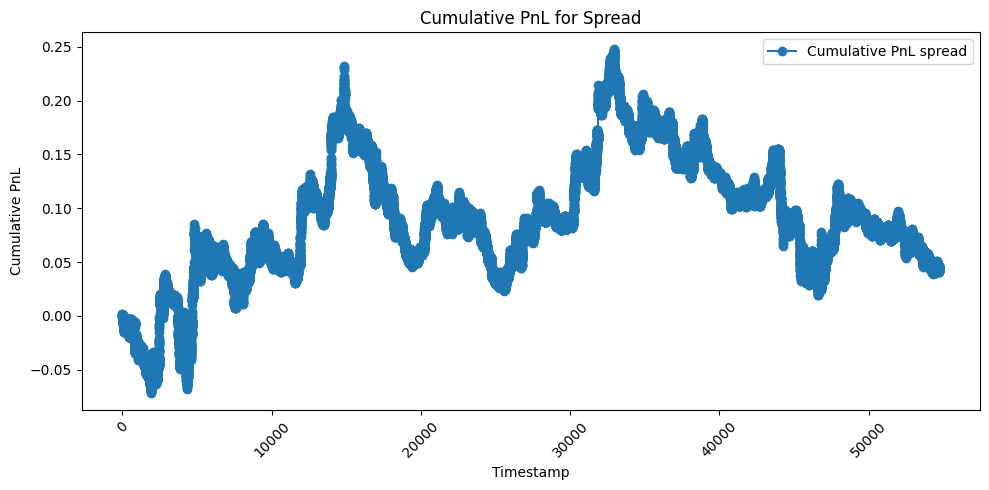

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(s1_test.index, s1_test["spread_cumulative_pnl"], marker="o", label="Cumulative PnL spread")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL for Spread")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

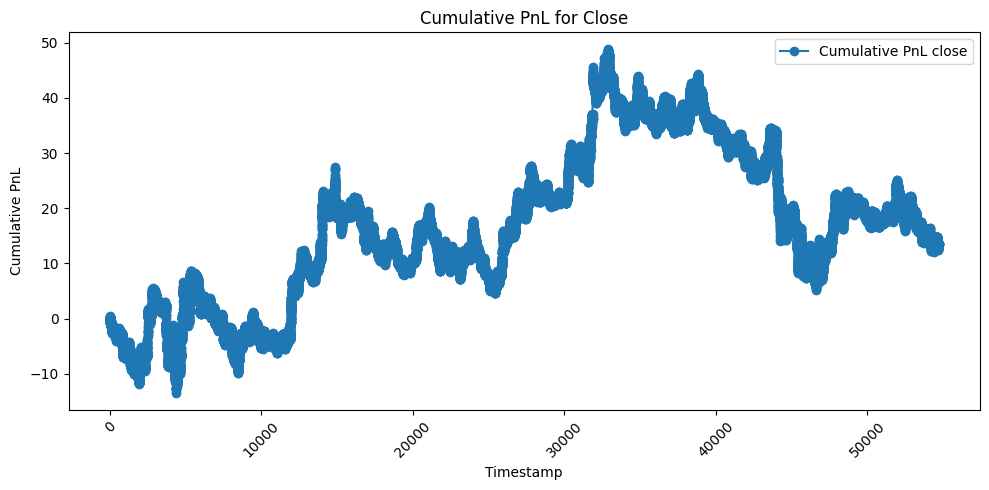

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(s1_test.index, s1_test["close_cumulative_pnl"], marker="o", label="Cumulative PnL close")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL for Close")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sign of return

Compute return (or price diff) from the previous bar.

If the last return is positive, go +1 for this bar; else go -1.

In [12]:
s2_test = test_data.copy()

In [13]:
s2_test["price_diff"] = s2_test["close"].diff()  # or .pct_change()

# Position at time t depends on sign of return at t-1
s2_test["pos_size_sign_return"] = np.where(s2_test["price_diff"].shift(1) > 0, 1.0, -1.0)
s2_test["pos_size_sign_return"].fillna(0, inplace=True)  # the first row has no previous bar

s2_test = compute_pnl(s2_test, pos_col="pos_size_sign_return", price_col="close")
s2_test = compute_pnl(s2_test, pos_col="pos_size_sign_return", price_col="spread")


/var/folders/d4/kmvfs86566qdvphh5mdyn9lw0000gn/T/ipykernel_91670/1081976646.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  s2_test["pos_size_sign_return"].fillna(0, inplace=True)  # the first row has no previous bar


In [20]:
xd = s2_test[['date', 'close_cumulative_pnl', 'spread_cumulative_pnl']]
xd.columns = ['date', 's2_close', 's2_spread']

tot_data = pd.merge(tot_data, xd)

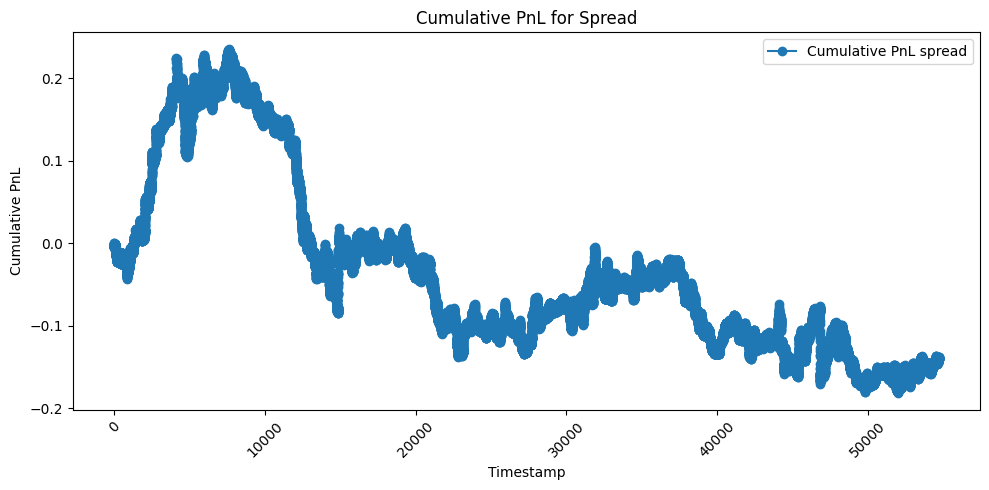

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(s2_test.index, s2_test["spread_cumulative_pnl"], marker="o", label="Cumulative PnL spread")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL for Spread")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

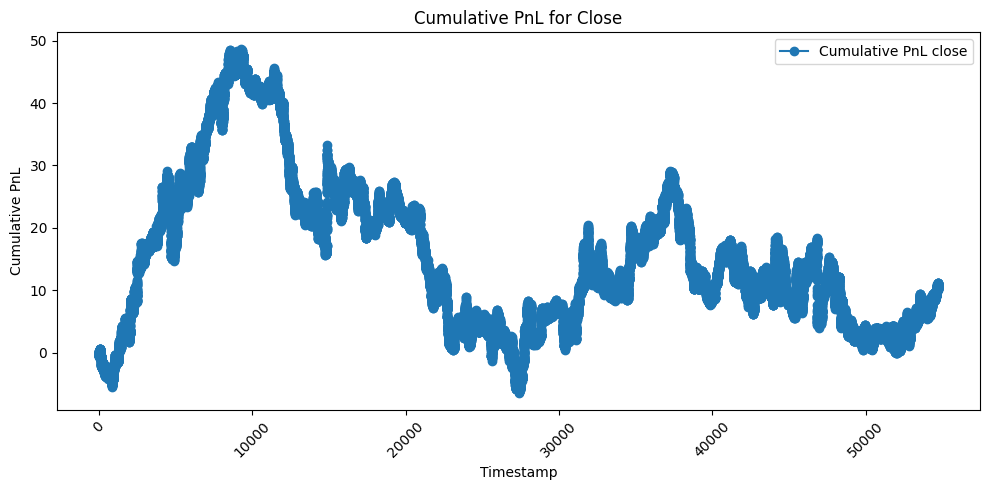

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(s2_test.index, s2_test["close_cumulative_pnl"], marker="o", label="Cumulative PnL close")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL for Close")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MACD

* traditional with 12, 26 period EMA's 
* with some hyperparams search since traditional 12, 26 might not be sufficient for our market

In [18]:
s3_test = test_data.copy()

In [19]:
s3_test = pd.concat([train_val_data, s3_test], axis=0)

In [20]:
def ema(series, span):
    return series.ewm(span=span, adjust=False).mean()

In [39]:
s3_test = compute_macd(s3_test, 12, 26, 9, 'close', 'pos_size')
s3_test = compute_pnl(s3_test, pos_col="pos_size", price_col="close")

In [40]:
s3_test = compute_macd(s3_test, 12, 26, 9, 'spread', 'pos_size')
s3_test = compute_pnl(s3_test, pos_col="pos_size", price_col="spread")

In [41]:
# get back original test_data
s3_test = s3_test[s3_test['timestamp'] >= TEST_TIME_LOWER_BOUND]


In [43]:
s3_test

,timestamp,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,...,ema_short,ema_long,macd,signal,pos_macd,pos_size,close_pnl,close_cumulative_pnl,spread_pnl,spread_cumulative_pnl
0,2024-09-01 00:00:00,2024-09-01 00:00:00,129.60,278154.620,-6.119717,0.097165,7.133702,0.100001,6.931380,1.054335,...,-6.119231,-6.119188,-0.000043,0.000079,-1,-1,-0.00,-168.59,-0.000137,-6.165794
1,2024-09-01 00:01:00,2024-09-01 00:01:00,129.58,79410.555,-6.119782,0.097085,7.139615,0.100001,6.931380,1.055284,...,-6.119316,-6.119232,-0.000083,0.000047,-1,-1,0.02,-168.57,0.000064,-6.165729
2,2024-09-01 00:02:00,2024-09-01 00:02:00,129.75,39305.651,-6.118752,0.096922,7.151600,0.100001,6.931381,1.088558,...,-6.119229,-6.119197,-0.000032,0.000031,-1,-1,-0.17,-168.74,-0.001029,-6.166759
3,2024-09-01 00:03:00,2024-09-01 00:03:00,129.65,67493.498,-6.119279,0.096928,7.151162,0.100001,6.931380,1.125874,...,-6.119237,-6.119203,-0.000034,0.000018,-1,-1,0.10,-168.64,0.000527,-6.166232
4,2024-09-01 00:04:00,2024-09-01 00:04:00,129.70,32584.541,-6.119245,0.095890,7.228562,0.105179,6.590150,1.151756,...,-6.119238,-6.119206,-0.000032,0.000008,-1,-1,-0.05,-168.69,-0.000034,-6.166266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54715,2024-10-08 23:55:00,2024-10-08 23:55:00,143.11,34769.351,-6.073768,0.045703,15.166275,0.100001,6.931380,1.675312,...,-6.074046,-6.074715,0.000670,0.000656,-1,1,0.13,-236.68,-0.000347,-6.514862
54716,2024-10-08 23:56:00,2024-10-08 23:56:00,143.09,31604.545,-6.073641,0.046123,15.028185,0.104888,6.608469,1.674431,...,-6.073983,-6.074636,0.000652,0.000656,-1,-1,0.02,-236.66,0.000127,-6.514735
54717,2024-10-08 23:57:00,2024-10-08 23:57:00,143.14,20553.896,-6.073386,0.038190,18.149921,0.100001,6.931395,1.673937,...,-6.073892,-6.074543,0.000652,0.000655,-1,-1,-0.05,-236.71,-0.000254,-6.514990
54718,2024-10-08 23:58:00,2024-10-08 23:58:00,143.13,25817.008,-6.073455,0.039528,17.535388,0.105396,6.576577,1.661102,...,-6.073824,-6.074463,0.000638,0.000652,-1,-1,0.01,-236.70,0.000068,-6.514921


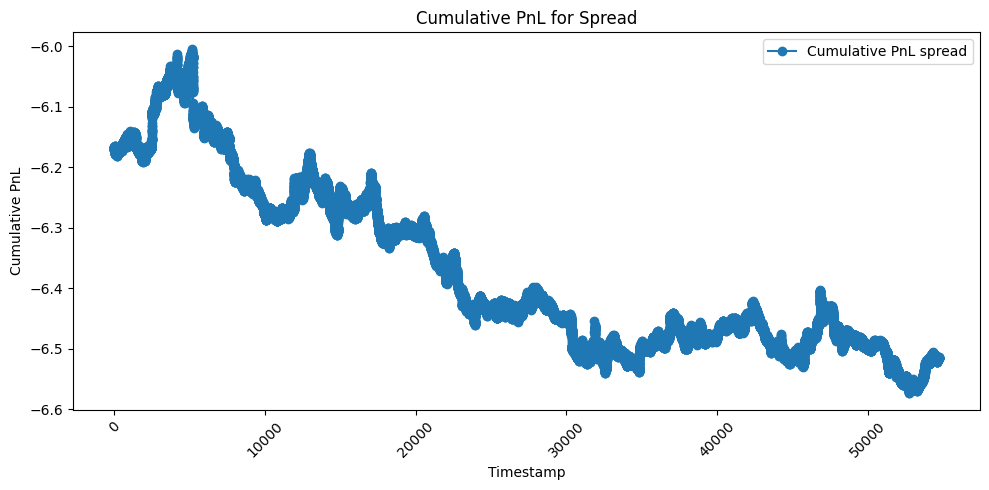

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(s3_test.index, s3_test["spread_cumulative_pnl"], marker="o", label="Cumulative PnL spread")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL for Spread")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

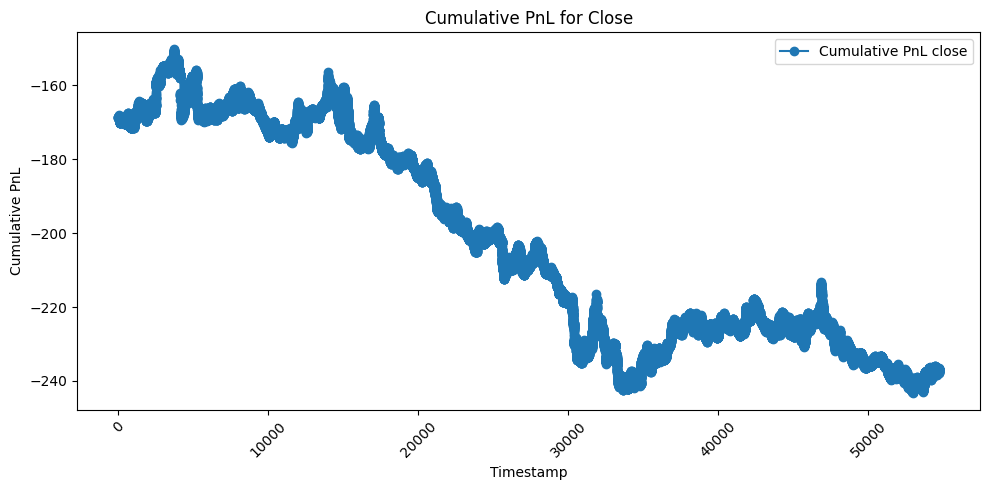

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(s3_test.index, s3_test["close_cumulative_pnl"], marker="o", label="Cumulative PnL close")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL for Close")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Let's do some simple hyperparameter tuning for MACD calculation since 12 26 rule may be bad for highfreq data

In [21]:
from src.utils import evaluate_macd_grid
from tqdm.notebook import tqdm
short_spans = [3,5,8,12,15,20,30]
long_spans  = [21,26,35,50,75,100]
signal_spans = [5,9,10,12,15]
param_grid = [(s, l, sig) for s in short_spans for l in long_spans for sig in signal_spans]
param_grid = tqdm(param_grid)

# Evaluate
results_df = evaluate_macd_grid(
    train_val_data,  
    val_windows=EVAL_WINDOWS,
    param_grid=param_grid,
    date_col="timestamp",  
    price_col="close"     
)

# Summarize
results_df = results_df.sort_values("avg_val_pnl", ascending=False)
print(results_df)
best_params = results_df.iloc[0]
print("\nBest Param Set by average validation PnL:")
print(best_params)

  0%|          | 0/210 [00:00<?, ?it/s]

     short_span  long_span  signal_span  avg_val_pnl
60            8         21            5       28.164
31            5         21            9       28.128
32            5         21           10       28.100
6             3         26            9       27.740
35            5         26            5       27.556
..          ...        ...          ...          ...
185          30         26            5      -11.536
181          30         21            9      -13.112
182          30         21           10      -13.584
187          30         26           10      -13.684
180          30         21            5      -18.240

[210 rows x 4 columns]

Best Param Set by average validation PnL:
short_span      8.000
long_span      21.000
signal_span     5.000
avg_val_pnl    28.164
Name: 60, dtype: float64


In [22]:
s3_test = test_data.copy()
s3_test = pd.concat([train_val_data, s3_test], axis=0)
s3_test = compute_macd(s3_test, 
                       best_params['short_span'], 
                       best_params['long_span'], 
                       best_params['signal_span'])
s3_test = s3_test[s3_test['timestamp'] >= TEST_TIME_LOWER_BOUND]
s3_test = compute_pnl(s3_test, pos_col="pos_macd", price_col='close')
s3_test.iloc[-1].close_cumulative_pnl

-5.490000000000094

In [27]:
xd = s3_test[['date', 'close_cumulative_pnl']]
xd.columns = ['date', 's3_tuned_close'
tot_data = pd.merge(tot_data, xd)

     short_span  long_span  signal_span  avg_val_pnl
180          30         21            5     0.138909
185          30         26            5     0.114516
187          30         26           10     0.087794
181          30         21            9     0.081957
182          30         21           10     0.071506
..          ...        ...          ...          ...
15            3         50            5    -0.419045
5             3         26            5    -0.425609
20            3         75            5    -0.427683
10            3         35            5    -0.430433
0             3         21            5    -0.447689

[210 rows x 4 columns]

Best Param Set by average validation PnL:
short_span     30.000000
long_span      21.000000
signal_span     5.000000
avg_val_pnl     0.138909
Name: 180, dtype: float64


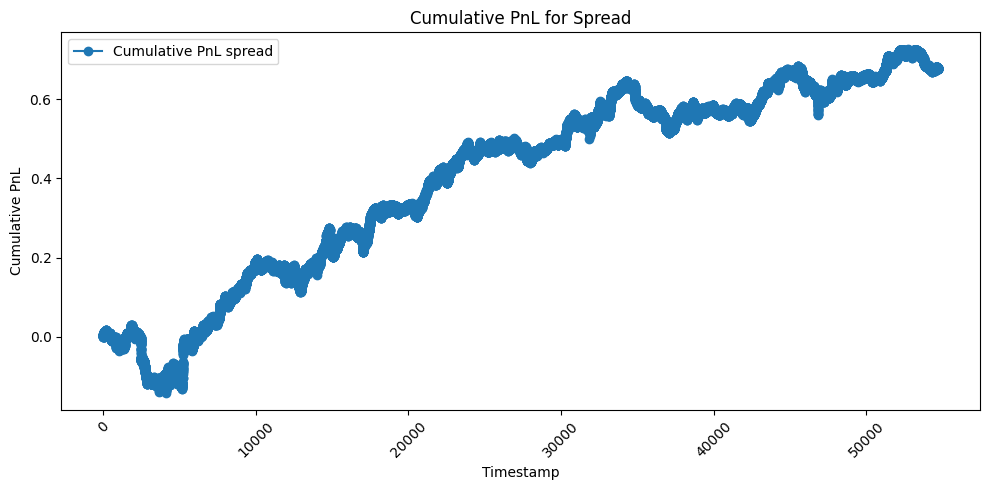

In [28]:
results_df = evaluate_macd_grid(
    train_val_data,  
    val_windows=EVAL_WINDOWS,
    param_grid=param_grid,
    date_col="timestamp",  
    price_col="spread"     
)
results_df = results_df.sort_values("avg_val_pnl", ascending=False)
print(results_df)
best_params = results_df.iloc[0]
print("\nBest Param Set by average validation PnL:")
print(best_params)
s3_test = test_data.copy()
s3_test = pd.concat([train_val_data, s3_test], axis=0)
s3_test = compute_macd(s3_test, 
                       best_params['short_span'], 
                       best_params['long_span'], 
                       best_params['signal_span'],
                       'spread')
s3_test = s3_test[s3_test['timestamp'] >= TEST_TIME_LOWER_BOUND]
s3_test = compute_pnl(s3_test, pos_col="pos_macd", price_col='spread')
s3_test.iloc[-1].spread_cumulative_pnl

plt.figure(figsize=(10, 5))
plt.plot(s3_test.index, s3_test["spread_cumulative_pnl"], marker="o", label="Cumulative PnL spread")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL for Spread")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
s3_test

,timestamp,date,close,volume,spread,mr_strength_ar_100,half_life_ar_100,theta_100,half_life_ou_100,hurst_100,...,kpss_p_1000,var_ratio_1000,rs_ratio_1000,ema_short,ema_long,macd,signal,pos_macd,spread_pnl,spread_cumulative_pnl
0,2024-09-01 00:00:00,2024-09-01 00:00:00,129.60,278154.620,-6.119717,0.097165,7.133702,0.100001,6.931380,1.054335,...,0.01,0.824733,425.984278,-6.119202,-6.119181,-0.000021,-0.000051,1,0.000000,0.000000
1,2024-09-01 00:01:00,2024-09-01 00:01:00,129.58,79410.555,-6.119782,0.097085,7.139615,0.100001,6.931380,1.055284,...,0.01,0.824571,425.746831,-6.119239,-6.119236,-0.000003,-0.000035,1,-0.000064,-0.000064
2,2024-09-01 00:02:00,2024-09-01 00:02:00,129.75,39305.651,-6.118752,0.096922,7.151600,0.100001,6.931381,1.088558,...,0.01,0.823685,425.494120,-6.119208,-6.119192,-0.000016,-0.000029,1,0.001029,0.000965
3,2024-09-01 00:03:00,2024-09-01 00:03:00,129.65,67493.498,-6.119279,0.096928,7.151162,0.100001,6.931380,1.125874,...,0.01,0.824560,425.250266,-6.119212,-6.119200,-0.000013,-0.000024,1,-0.000527,0.000438
4,2024-09-01 00:04:00,2024-09-01 00:04:00,129.70,32584.541,-6.119245,0.095890,7.228562,0.105179,6.590150,1.151756,...,0.01,0.824481,425.014793,-6.119214,-6.119204,-0.000011,-0.000019,1,0.000034,0.000473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54715,2024-10-08 23:55:00,2024-10-08 23:55:00,143.11,34769.351,-6.073768,0.045703,15.166275,0.100001,6.931380,1.675312,...,0.01,0.995745,399.044731,-6.074845,-6.074509,-0.000336,-0.000320,-1,0.000347,0.676820
54716,2024-10-08 23:56:00,2024-10-08 23:56:00,143.09,31604.545,-6.073641,0.046123,15.028185,0.104888,6.608469,1.674431,...,0.01,0.992044,398.800214,-6.074767,-6.074430,-0.000337,-0.000326,-1,-0.000127,0.676692
54717,2024-10-08 23:57:00,2024-10-08 23:57:00,143.14,20553.896,-6.073386,0.038190,18.149921,0.100001,6.931395,1.673937,...,0.01,0.988553,398.540896,-6.074678,-6.074335,-0.000343,-0.000331,-1,-0.000254,0.676438
54718,2024-10-08 23:58:00,2024-10-08 23:58:00,143.13,25817.008,-6.073455,0.039528,17.535388,0.105396,6.576577,1.661102,...,0.01,0.982346,398.262231,-6.074599,-6.074255,-0.000344,-0.000336,-1,0.000068,0.676506


In [35]:
xd = s3_test[['date', 'spread_cumulative_pnl']]
xd.columns = ['date', 's3_tuned_spread']
tot_data = pd.merge(tot_data, xd)

     short_span  long_span  signal_span  avg_val_pnl
60            8         21            5       28.164
31            5         21            9       28.128
32            5         21           10       28.100
6             3         26            9       27.740
35            5         26            5       27.556
..          ...        ...          ...          ...
185          30         26            5      -11.536
181          30         21            9      -13.112
182          30         21           10      -13.584
187          30         26           10      -13.684
180          30         21            5      -18.240

[210 rows x 4 columns]

Best Param Set by average validation PnL:
short_span      8.000
long_span      21.000
signal_span     5.000
avg_val_pnl    28.164
Name: 60, dtype: float64


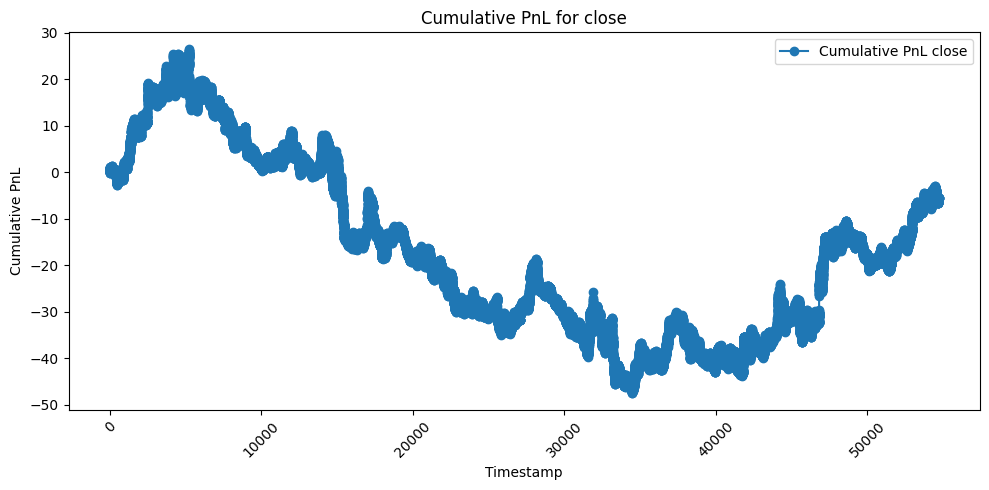

In [37]:
results_df = evaluate_macd_grid(
    train_val_data,  
    val_windows=EVAL_WINDOWS,
    param_grid=param_grid,
    date_col="timestamp",  
    price_col="close"     
)
results_df = results_df.sort_values("avg_val_pnl", ascending=False)
print(results_df)
best_params = results_df.iloc[0]
print("\nBest Param Set by average validation PnL:")
print(best_params)
s3_test = test_data.copy()
s3_test = pd.concat([train_val_data, s3_test], axis=0)
s3_test = compute_macd(s3_test, 
                       best_params['short_span'], 
                       best_params['long_span'], 
                       best_params['signal_span'], 
                       'close')
s3_test = s3_test[s3_test['timestamp'] >= TEST_TIME_LOWER_BOUND]
s3_test = compute_pnl(s3_test, pos_col="pos_macd", price_col='close')

plt.figure(figsize=(10, 5))
plt.plot(s3_test.index, s3_test["close_cumulative_pnl"], marker="o", label="Cumulative PnL close")
plt.xlabel("Timestamp")
plt.ylabel("Cumulative PnL")
plt.title(f"Cumulative PnL for close")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
xd = s3_test[['date', 'close_cumulative_pnl']]
xd.columns = ['date', 's3_tuned_close']
tot_data = pd.merge(tot_data, xd)

In [42]:
tot_data.to_csv('tot_data.csv')